# Project 3

**Dataset(s) to be used:** 
df: [https://data.colorado.gov/Energy/Electricity-Revenue-by-Utility-in-US/ue5s-8u8t/about_data] 
mkts: [https://www.electricchoice.com/map-deregulated-energy-markets/]

**Analysis question:**
- Do different types of ownership (e.g., investor-owned, municipal, or cooperative) correlate with higher or lower electricity prices for customers?
- Does deregulation impact electricity prices?

**Columns that will (likely) be used:**

- Column 0:year

- Column 1:ownership

- Column 12:resPrice

- Column 16:comRev

- Column 16:comRev

- Column 28:totalPrice



**Columns to be used to merge/join them:**

- [mkts] [column:Abbreviation]

- [df] [column: state]

**Hypothesis:** Government-owned utilities tend to have lower electricity prices for all types of customers, while deregulated markets typically have the highest prices.

**Site URL:** [the *.readthedocs.io URL of your live site, from the Publish section]

In [4]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode+jupyterlab+notebook_connected"

#read in data
df = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 3/Electricity_Revenue_by_Utility_in_US_20241206.csv')
df.head()
df['state'].unique()

# date cleaning - delete ineffective state name like 'A', 'B', etc.
state_abbreviation = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 3/US state abbreviation.csv')
list_of_state = state_abbreviation['Abbreviation'].unique()
df_cleaned = df[df['state'].isin(list_of_state)]
df_cleaned['state'].unique()

array(['MN', 'WI', 'SC', 'MS', 'NE', 'OH', 'NC', 'TX', 'IL', 'KS', 'NY',
       'IN', 'IA', 'TN', 'VT', 'FL', 'CO', 'CA', 'KY', 'GA', 'AK', 'AL',
       'LA', 'WY', 'MA', 'MO', 'PA', 'CT', 'SD', 'WA', 'OK', 'MT', 'MI',
       'AZ', 'ND', 'UT', 'ID', 'MD', 'HI', 'VA', 'WV', 'AR', 'NM', 'NV',
       'NH', 'OR', 'NJ', 'DE', 'ME', 'RI', 'DC'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83731 entries, 0 to 83730
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           83731 non-null  int64  
 1   utilityNumber  83713 non-null  float64
 2   utilityName    83731 non-null  object 
 3   state          83731 non-null  object 
 4   part           77331 non-null  object 
 5   serviceType    77331 non-null  object 
 6   dataType       77331 non-null  object 
 7   ownership      75123 non-null  object 
 8   baCode         34611 non-null  object 
 9   resRev         81117 non-null  float64
 10  resSales       81118 non-null  float64
 11  resCust        81115 non-null  float64
 12  resPrice       74755 non-null  float64
 13  comRev         81640 non-null  float64
 14  comSales       81636 non-null  float64
 15  comCust        81636 non-null  float64
 16  comPrice       77420 non-null  float64
 17  indRev         74583 non-null  float64
 18  indSal

## Classify the data into deregulated and regulated markets

In [7]:
mkts = pd.read_csv('/Users/linali/Desktop/24 Fall/Computing in Context/Project 3/deregulated market in US.csv')
mkts.info()
#filter the deregulated markets
deregulated_mkts = mkts[mkts['Electric'] != 'No']
deregulated_mkts

# merge the list of state abbreviations with deregulated mkts
deregulated_mkts_abbr = pd.merge(deregulated_mkts, state_abbreviation, on='State', how = 'left')
deregulated_mkts_abbr

# Classify the data into deregulated and regulated markets
deregulated_mkts_list = deregulated_mkts_abbr['Abbreviation'].unique()
df_cleaned.loc[df_cleaned['state'].isin(deregulated_mkts_list),'market type'] = 'deregulated'
df_cleaned.loc[~df_cleaned['state'].isin(deregulated_mkts_list),'market type'] = 'regulated'
df_cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   Gas       51 non-null     object 
 2   Year      27 non-null     object 
 3   Electric  51 non-null     object 
 4   Year.1    17 non-null     float64
 5   Comments  51 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.5+ KB


/var/folders/3t/2_s7ggxx7kx3z_1z7rt_t0dm0000gn/T/ipykernel_24871/1840817188.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,utilityNumber,utilityName,state,part,serviceType,dataType,ownership,baCode,resRev,...,indPrice,transRev,transSales,transCust,transPrice,totalRev,totalSales,totalCust,totalPrice,market type
0,1999,1233.0,Barnesville City of,MN,NaN,NaN,NaN,NaN,NaN,751.0,...,NaN,0.0,0.0,0.0,NaN,1025.0,17190.0,1174.0,5.96,regulated
1,1999,7665.0,Gresham Village of,WI,NaN,NaN,NaN,NaN,NaN,471.0,...,5.17,14.0,116.0,2.0,12.07,970.0,15209.0,948.0,6.38,regulated
2,1999,7654.0,Greer Comm of Public Works,SC,NaN,NaN,NaN,NaN,NaN,8365.0,...,NaN,113.0,1664.0,1.0,6.79,14859.0,210297.0,10362.0,7.07,regulated
3,1999,7651.0,Greenwood Utilities Comm,MS,NaN,NaN,NaN,NaN,NaN,5705.0,...,4.91,101.0,1642.0,2.0,6.15,16219.0,291687.0,10106.0,5.56,regulated
4,1999,7650.0,Greenwood Village of,NE,NaN,NaN,NaN,NaN,NaN,158.0,...,NaN,0.0,0.0,0.0,NaN,269.0,3675.0,273.0,7.32,regulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80794,2022,99999.0,Adjustment 2022,PA,B,Energy,I,NaN,NYIS,746.3,...,NaN,0.0,0.0,0.0,NaN,1516.6,13945.0,1070.0,10.90,deregulated
80795,2022,99999.0,Adjustment 2022,PA,B,Energy,I,NaN,PJM,33707.8,...,7.00,15382.7,261827.0,2.0,13091350.00,152205.3,1937382.0,49782.0,7.90,deregulated
80796,2022,99999.0,Adjustment 2022,RI,B,Energy,I,NaN,ISNE,37.6,...,8.60,-283.6,-4002.0,0.0,NaN,-129.9,4982.0,1001.0,-2.60,deregulated
80797,2022,99999.0,Adjustment 2022,VA,B,Energy,I,NaN,PJM,0.0,...,8.10,0.0,0.0,0.0,NaN,288021.1,3510786.0,-3508.0,8.20,deregulated


## For Residential Consumers

In [9]:
df_cleaned['year'].unique()

array([1999, 2020, 2000, 2021, 2018, 2001, 2022, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2019, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

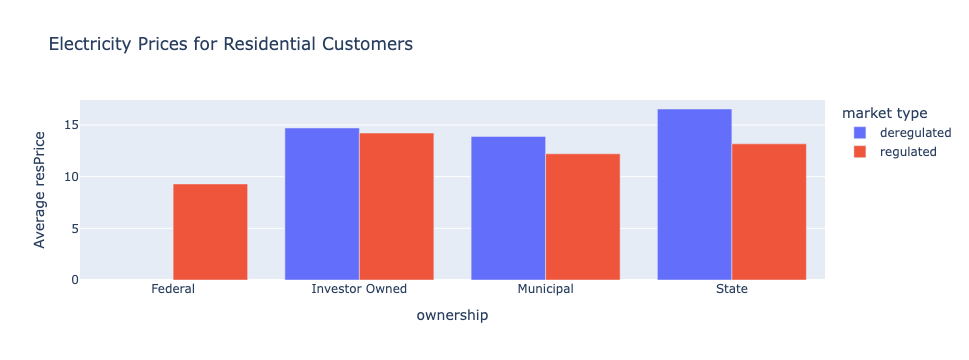

In [10]:
df_2022 = df_cleaned[df_cleaned['year'] == 2022]
resavg = df_2022.groupby(['ownership', 'market type'])['resPrice'].mean().reset_index(name = 'Average resPrice')

# Filter the DataFrame to include only the desired ownership types
filtered_resavg = resavg[resavg['ownership'].isin(['Investor Owned', 'Municipal', 'State', 'Federal'])]
fig1 = px.bar(filtered_resavg, x = 'ownership', y = 'Average resPrice', color = 'market type', title = 'Electricity Prices for Residential Customers',barmode='group')
fig1

## For Industrial Consumers

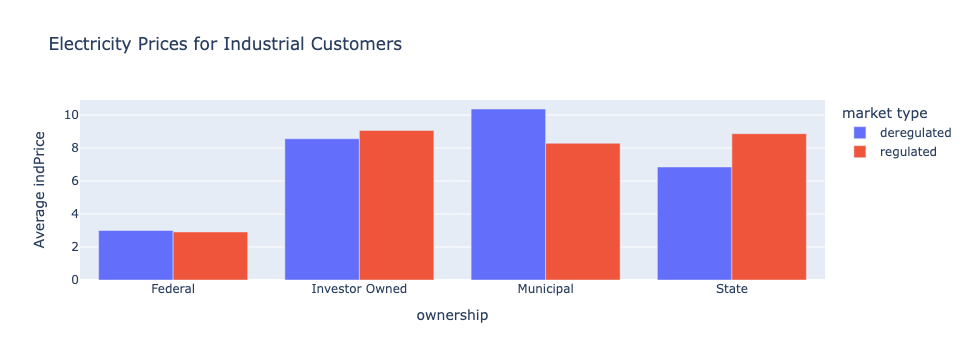

In [12]:
indavg = df_2022.groupby(['ownership', 'market type'])['indPrice'].mean().reset_index(name = 'Average indPrice')

# Filter the DataFrame to include only the desired ownership types
filtered_indavg = indavg[indavg['ownership'].isin(['Investor Owned', 'Municipal', 'State', 'Federal'])]
fig2 = px.bar(filtered_indavg, x = 'ownership', y = 'Average indPrice', color = 'market type', title = 'Electricity Prices for Industrial Customers',barmode='group')
fig2

## For Commercial Consumers

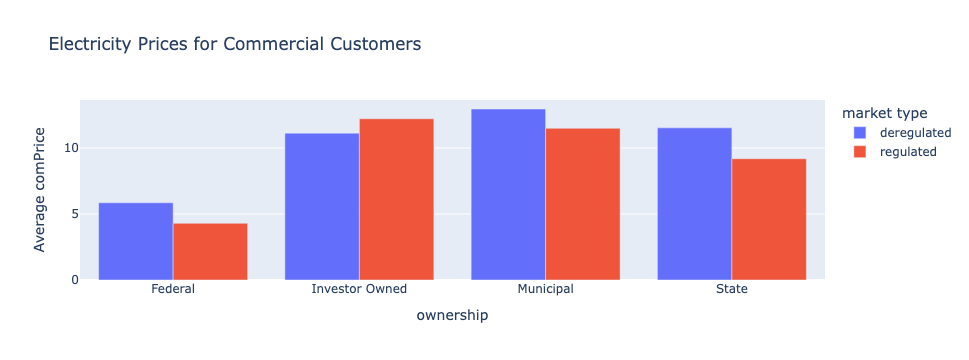

In [14]:
comavg = df_2022.groupby(['ownership', 'market type'])['comPrice'].mean().reset_index(name = 'Average comPrice')

# Filter the DataFrame to include only the desired ownership types
filtered_comavg = comavg[comavg['ownership'].isin(['Investor Owned', 'Municipal', 'State', 'Federal'])]
fig3 = px.bar(filtered_comavg, x = 'ownership', y = 'Average comPrice', color = 'market type', title = 'Electricity Prices for Commercial Customers',barmode='group')
fig3

## For All Consumers

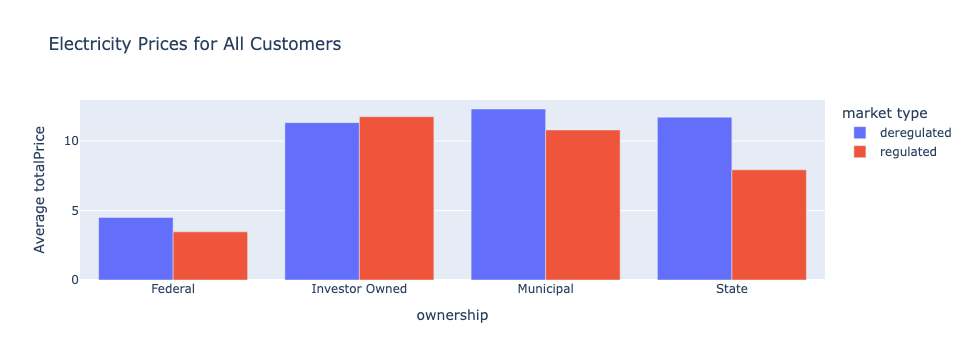

In [16]:
totalavg = df_2022.groupby(['ownership', 'market type'])['totalPrice'].mean().reset_index(name = 'Average totalPrice')

# Filter the DataFrame to include only the desired ownership types
filtered_totalavg = totalavg[totalavg['ownership'].isin(['Investor Owned', 'Municipal', 'State', 'Federal'])]
fig3 = px.bar(filtered_totalavg, x = 'ownership', y = 'Average totalPrice', color = 'market type', title = 'Electricity Prices for All Customers',barmode='group')
fig3

In [17]:
stateavg = df_2022.groupby(['state', 'ownership', 'market type'])['totalPrice'].mean().reset_index(name = 'Average totalPrice')
stateavg

,state,ownership,market type,Average totalPrice
0,AK,Cooperative,regulated,26.342857
1,AK,Investor Owned,regulated,22.533333
2,AK,Municipal,regulated,11.400000
3,AL,Cooperative,regulated,12.840909
4,AL,Federal,regulated,5.100000
...,...,...,...,...
233,WV,Investor Owned,regulated,10.100000
234,WY,Cooperative,regulated,9.833333
235,WY,Federal,regulated,3.800000
236,WY,Investor Owned,regulated,10.960000


## Electricity prices by state

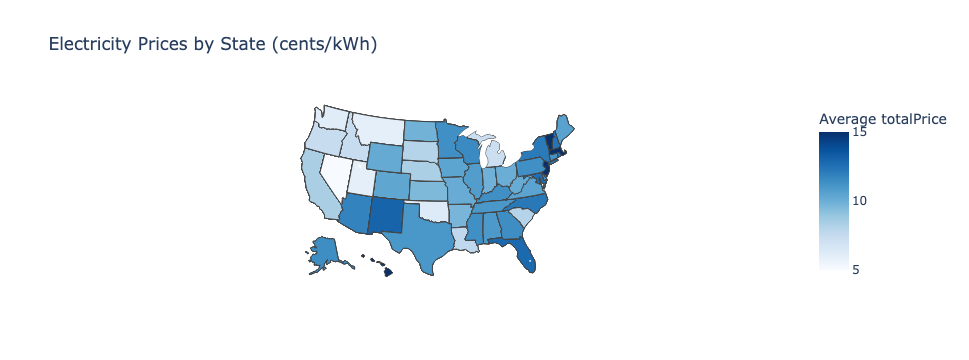

In [19]:
fig4 = px.choropleth(
    stateavg,
    locations="state",
    locationmode="USA-states",
    color="Average totalPrice",
    hover_data=["state", "Average totalPrice"],  # Show more details on hover
    color_continuous_scale="blues",
    range_color=[5, 15],
    title="Electricity Prices by State (cents/kWh)",
    scope="usa"
)
fig4

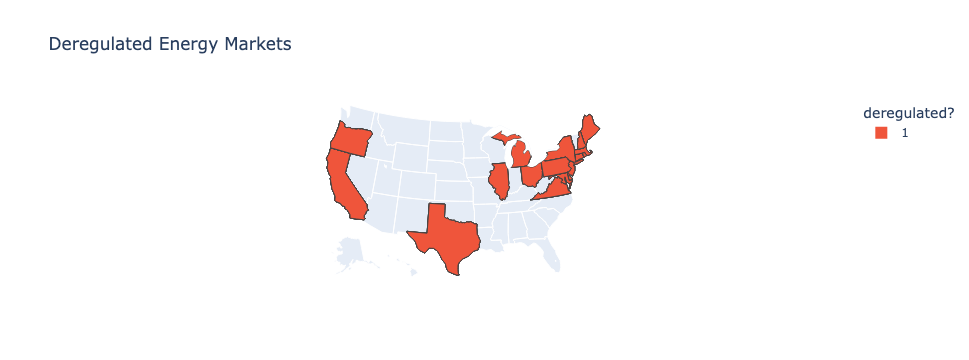

In [20]:
#plot deregulated and regulated markets in map
stateavg.loc[stateavg['market type'] == 'deregulated','deregulated?'] = '1'
fig5 = px.choropleth(
    stateavg,
    locations="state",
    locationmode="USA-states",
    color="deregulated?",
    hover_data=["state", "deregulated?"],  # Show more details on hover
    color_continuous_scale="Viridis",
    range_color=[0, 1],
    title="Deregulated Energy Markets",
    scope="usa"
)
fig5

# Takeaways

- For residential customers, the average price from state-owned utilities is the highest, followed by investor-owned utilities, regardless of whether the market is regulated or deregulated
- For industrial customers, in regulated markets, state-owned utilities have the highest electricity price. In deregulated markets, municipal-owned utilities have the highest electricity price. Investor-owned utilities have the second highest price, regardless of whether the market is regulated or deregulated
- For commercial customers, in regulated markets, investor-owned utilities have the highest price, while in deregulated markets, municipal-owned utilities have the highest price.
- Overall, on average, for all types of customers, municipal utilities have the highest price in deregulated markets, whereas investor-owned utilities have the highest price in regulated markets.
- The choropleth map does not show an obvious relationship between prices and deregulated markets